# 常用函数

## torch.cat()

torch.cat() 是 PyTorch 中用于将多个张量在指定维度上进行连接的函数。与 torch.stack() 不同，torch.cat() 不会创建新维度，而是在现有维度上将张量连接在一起。

outputs = torch.cat(inputs, dim=?) → Tensor  
参数

inputs : 待连接的张量序列，可以是任意相同Tensor类型的python 序列  
dim : 选择的扩维, 必须在0到len(inputs[0])之间，沿着此维连接张量序列。

In [9]:
# 假设有三个形状相同的张量：
a = torch.tensor([1, 2])
print(a.shape)
b = torch.tensor([3, 4])
c = torch.tensor([5, 6])

# 可以使用 torch.cat 沿维度将它们堆叠起来：
cated = torch.cat([a, b, c], dim=0)
print(cated)

torch.Size([2])
tensor([1, 2, 3, 4, 5, 6])


In [11]:
# 超过现有维度会报错
torch.cat([a, b, c], dim=1)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

## torch.stack()

torch.stack 是 PyTorch 中用于沿新维度连接一组张量的函数。与 torch.cat 不同，torch.stack 会创建一个新的维度，将输入的张量堆叠在一起。

语法

torch.stack(tensors, dim=0)  
tensors：需要堆叠的张量序列，这些张量的形状必须相同。  
dim：新维度插入的位置，默认是 0，表示在最外层创建一个新的维度。

In [8]:
# 假设有三个形状相同的张量：
a = torch.tensor([1, 2])
print(a.shape)
b = torch.tensor([3, 4])
c = torch.tensor([5, 6])

# 可以使用 torch.stack 沿新维度将它们堆叠起来：
stacked = torch.stack([a, b, c], dim=0)
print(stacked)
print(stacked.shape)

torch.Size([2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


## masked_fill()

masked_fill方法有两个参数，mask和value，mask是一个pytorch张量（Tensor），元素是布尔值，value是要填充的值，**填充规则是mask中取值为True位置对应于self的相应位置用value填充**。

In [1]:
import torch

t = torch.randn(3,2)
t

tensor([[-1.7544, -1.5359],
        [-2.1221, -0.3324],
        [ 1.0647, -0.1458]])

In [2]:
m = torch.randint(0,2,(3,2))
m == 0

tensor([[False, False],
        [False,  True],
        [ True, False]])

In [3]:
t.masked_fill(m == 0, -1e9)

tensor([[-1.7544e+00, -1.5359e+00],
        [-2.1221e+00, -1.0000e+09],
        [-1.0000e+09, -1.4581e-01]])

## torch.topk()

在 PyTorch 中，torch.topk 函数是一个非常实用的工具，它允许我们从给定维度的张量中获取最大或最小的 k 个元素。这个函数返回两个值：一个包含顶部 k 个值的张量，以及这些值在原始张量中的索引。

torch.topk 函数的基本语法如下：

torch.topk(input, k, dim=None, largest=True, sorted=True, \*, out=None)
这里的参数意义如下：

input：输入的张量。

k：需要返回的元素数量。

dim：要排序的维度。如果不指定，则默认为输入张量的最后一个维度。

largest：一个布尔值，指定是返回最大还是最小的元素。

sorted：一个布尔值，指定返回的元素是否需要排序。

out：一个可选的输出缓冲元组，可以用来存放结果。

In [1]:
import torch

# 创建一个一维张量
x = torch.arange(1., 6.)

# 获取最大的三个元素及其索引
values, indices = torch.topk(x, 3)

In [2]:
values

tensor([5., 4., 3.])

In [3]:
indices

tensor([4, 3, 2])

## permute()

功能：可以对张量的多个维度进行任意顺序的重新排列。  
使用方式：permute(\*dims)，其中 dims 是新维度顺序的列表。  
适用场景：当你需要对张量的多个维度进行重排时，permute 非常灵活，可以指定任何顺序。  

In [5]:
x = torch.randn(2, 3, 4)  # 形状为 (2, 3, 4)
x_permuted = x.permute(2, 0, 1)  # 形状变为 (4, 2, 3)

## transpose()

功能：只能交换两个指定的维度。  
使用方式：transpose(dim0, dim1)，其中 dim0 和 dim1 是需要交换的两个维度。  
适用场景：当只需要交换两个维度的位置时，transpose 更简洁。

In [4]:
x = torch.randn(2, 3, 4)  # 形状为 (2, 3, 4)
x_transposed = x.transpose(1, 2)  # 形状变为 (2, 4, 3)

## contiguous()

contiguous() 是 PyTorch 中用于确保张量在内存中是连续存储的。当一个张量的形状被改变，比如通过 permute 或 transpose 操作时，它的元素在内存中的顺序可能会变得不连续，而 contiguous() 会创建一个连续存储的新张量，以便后续操作可以更有效地进行。

假设我们有一个张量在内存中按顺序排列，当对张量使用 permute 或 transpose 改变维度顺序时，虽然逻辑上的维度顺序改变了，但数据在物理内存中的位置并未真正调整。这时，如果需要对张量进行类似于 .view() 的操作，PyTorch 要求张量在内存中是连续的，这样可以确保按期望的顺序访问数据。

In [6]:
x = torch.randn(2, 3)
x_t = x.permute(1, 0)  # 交换维度顺序，x_t在内存中可能不连续
x_t = x_t.contiguous()  # 确保x_t在内存中连续

## torch.unsqueeze()

torch.unsqueeze 用于在张量的指定位置增加一个维度。新的维度大小为 1。

语法：

torch.unsqueeze(input, dim)  
input：输入张量。  
dim：要增加维度的位置索引。

In [12]:
x = torch.tensor([1, 2, 3])  # 形状为 (3,)
x_unsqueezed = torch.unsqueeze(x, 0)  # 在第0个维度增加维度
print(x_unsqueezed)  # 输出: tensor([[1, 2, 3]])
print(x_unsqueezed.shape)  # 输出: torch.Size([1, 3])

tensor([[1, 2, 3]])
torch.Size([1, 3])


## torch.squeeze()

torch.squeeze 用于移除张量中大小为 1 的维度（即单个元素的维度）。

语法：

torch.squeeze(input, dim=None)  
input：输入张量。  
dim（可选）：指定要移除的维度索引，如果该维度的大小为 1，则移除；如果不指定 dim，则移除所有大小为 1 的维度。

In [13]:
y = torch.tensor([[[1, 2, 3]]])  # 形状为 (1, 1, 3)
y_squeezed = torch.squeeze(y)  # 自动移除所有为1的维度
print(y_squeezed)  # 输出: tensor([1, 2, 3])
print(y_squeezed.shape)  # 输出: torch.Size([3])

tensor([1, 2, 3])
torch.Size([3])


In [14]:
# 如果只想去掉某一个维度（假设这里是第 0 维），可以指定 dim 参数：
y_squeezed_dim0 = torch.squeeze(y, dim=0)
print(y_squeezed_dim0.shape)  # 输出: torch.Size([1, 3])

torch.Size([1, 3])


## repeat()

repeat 是 PyTorch 中用于沿指定维度复制张量内容的操作，可以将张量扩展成更大的尺寸，而不是增加维度本身。

语法

tensor.repeat(\*sizes)  
sizes：一个整数元组，每个数值表示在对应维度上要复制的次数。

In [15]:
# 假设有一个形状为 (2, 3) 的张量：
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# 如果要在第 0 维度上复制 2 次，在第 1 维度上复制 3 次，可以这样使用 repeat：
x_repeated = x.repeat(2, 3)
print(x_repeated)

tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6],
        [1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6]])


repeat 会实际扩展数据的内存，如果只想增加维度而不复制数据，可以使用 expand 方法。

## expand()

expand 是 PyTorch 中用于在指定维度上扩展张量的操作，但与 repeat 不同的是，expand 不会实际复制数据，而是创建一个“视图”，通过改变张量的形状来让数据在特定维度上重复显示，因此它的内存效率更高。

语法
 
tensor.expand(\*sizes)  
sizes：表示新形状的整数元组，其中每个维度的大小必须与原始大小相等或等于 1，才能扩展。

In [16]:
x = torch.tensor([[1, 2, 3]])  # 形状为 (1, 3)

# 如果要在第 0 维度上扩展到大小 2，可以使用 expand：
x_expanded = x.expand(2, 3)
print(x_expanded)

tensor([[1, 2, 3],
        [1, 2, 3]])


In [17]:
x.expand(2, 4)

RuntimeError: The expanded size of the tensor (4) must match the existing size (3) at non-singleton dimension 1.  Target sizes: [2, 4].  Tensor sizes: [1, 3]

expand 只能扩展原来是 1 的维度。如果一个维度大小不是 1，不能对该维度使用 expand。  
由于 expand 只是视图操作，修改 x_expanded 的内容也会影响到原始张量 x。

## view()

view() 是 PyTorch 张量对象的一个方法，用来调整张量的形状（shape）。它与 NumPy 中的 reshape() 类似，可以将张量重新排列成指定的形状，而不改变数据的存储方式。

In [1]:
import torch

# 创建一个 1x6 的张量
tensor = torch.tensor([[1, 2, 3, 4, 5, 6]])

# 改成 2x3 的形状
reshaped_tensor = tensor.view(2, 3)
print(reshaped_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [2]:
tensor = torch.tensor([[1, 2, 3, 4, 5, 6]])
reshaped_tensor = tensor.view(3, -1)  # 自动推断出 2
print(reshaped_tensor)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


view() 的前提是张量在内存中是连续的，因此有时需要调用 contiguous() 来确保张量的内存连续性。如何一起使用

In [3]:
import torch

# 创建一个形状为 (2, 3) 的张量
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("原始张量：")
print(x)

# 转置会导致张量在内存中不连续
x_transposed = x.t()  # 转置后的形状为 (3, 2)
print("\n转置后的张量：")
print(x_transposed)

# 尝试使用 view() 会报错，因为内存不连续
try:
    x_reshaped = x_transposed.view(6)
except RuntimeError as e:
    print("\n使用 view() 报错：", e)

# 使用 contiguous() 使张量在内存中连续
x_contiguous = x_transposed.contiguous().view(6)
print("\n使用 contiguous() 后的张量：")
print(x_contiguous)

原始张量：
tensor([[1, 2, 3],
        [4, 5, 6]])

转置后的张量：
tensor([[1, 4],
        [2, 5],
        [3, 6]])

使用 view() 报错： view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

使用 contiguous() 后的张量：
tensor([1, 4, 2, 5, 3, 6])


## size()

size() 函数用于返回张量的形状（Shape），即张量在各个维度上的大小。这个函数常用于了解张量的形状信息，帮助我们在操作张量时确保维度匹配。

In [4]:
import torch
x = torch.randn(2, 3, 4)  # 生成一个形状为 (2, 3, 4) 的随机张量
print(x.size())           # 输出: torch.Size([2, 3, 4])

torch.Size([2, 3, 4])


In [5]:
# 返回最后一个维度
x.size(-1)

4

## torch.matmul()

torch.matmul() 是 PyTorch 中用于执行矩阵乘法（matrix multiplication）的一种函数。它支持多种输入维度，并根据输入张量的维度来决定矩阵乘法的行为，特别适合线性代数运算、深度学习中的权重计算等。

torch.matmul(input, other) 会根据 input 和 other 的形状来进行不同的矩阵运算：

两个一维张量（向量）：返回它们的内积，结果是一个标量（0维）。  
一个一维张量（向量）和一个二维张量（矩阵）：将向量视为行向量或列向量，返回矩阵向量乘法的结果。  
两个二维张量（矩阵）：执行标准的矩阵乘法。  
更高维的张量（Batch Matrix Multiplication）：对于大于二维的张量，会进行批次矩阵乘法，每个批次单独乘法。例如，给定形状为 (b, n, m) 的张量与形状为 (b, m, p) 的张量，将在第一个维度上执行 b 次矩阵乘法。

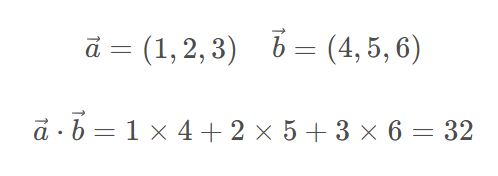

In [6]:
# 向量内积（dot product）

import torch
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
print(torch.matmul(a, b))  # 输出: tensor(32)

tensor(32)


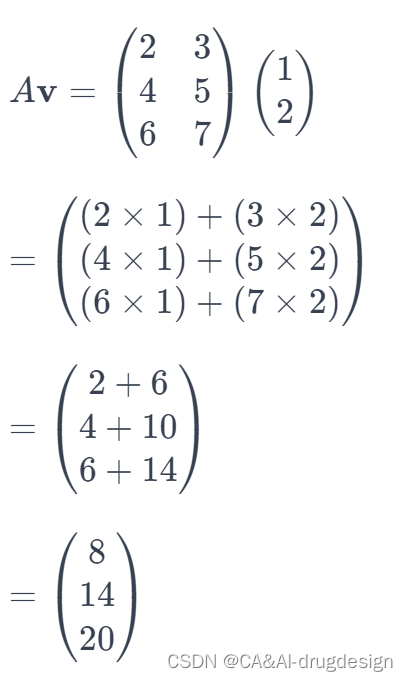

In [7]:
# 矩阵和向量相乘

matrix = torch.tensor([[1, 2], [3, 4], [5, 6]])
vector = torch.tensor([1, 2])
print(torch.matmul(matrix, vector))  # 输出: tensor([ 5, 11, 17])

tensor([ 5, 11, 17])


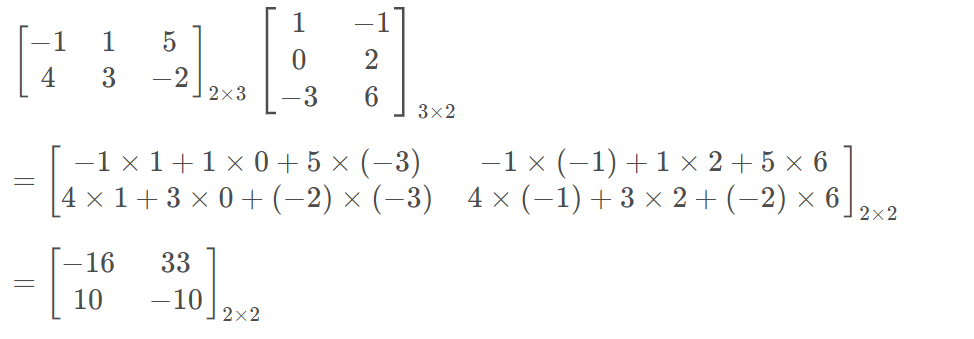

In [8]:
# 矩阵乘法

mat1 = torch.tensor([[1, 2], [3, 4]])
mat2 = torch.tensor([[5, 6], [7, 8]])
print(torch.matmul(mat1, mat2))
# 输出:
# tensor([[19, 22],
#         [43, 50]])

tensor([[19, 22],
        [43, 50]])


In [9]:
# 批次矩阵乘法

batch1 = torch.randn(2, 3, 4)
batch2 = torch.randn(2, 4, 5)
result = torch.matmul(batch1, batch2)  # 结果形状为 (2, 3, 5)
print(result)

tensor([[[ 1.5533,  2.1093, -6.0380,  0.3383,  1.2248],
         [ 1.2020,  1.2591, -3.7934,  0.6298,  0.4967],
         [ 0.1067, -1.1043,  1.8767, -0.8144, -0.1047]],

        [[ 0.0994,  2.9233, -3.1857,  0.7939,  0.4746],
         [ 0.4488, -1.5484,  3.7100, -0.7923,  1.3918],
         [ 0.2843, -1.7105,  3.2423, -0.9294,  0.5593]]])


## 魔法函数

所谓魔法函数，是Python的一种高级语法，允许你在类中自定义函数并绑定到类的特殊方法中，可以为类增加一些额外功能。

Python中以双下划线(\_\_xx\_\_)开始和结束的函数（不可自己定义）为魔法函数。  
调用类实例化的对象的方法时自动调用魔法函数。  
在自己定义的类中，可以实现之前的内置函数。

### `__len__()`

在 Python 中，`__len__()` 是一个特殊方法，用于定义对象的“长度”，也就是对象的元素数量。它允许你通过内置的 `len()` 函数来获取该对象的长度。常用于自定义类中，使类实例表现得像内置的序列类型（如列表、字符串等）。

In [10]:
class MyList:
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

# 使用示例
my_list = MyList([1, 2, 3, 4, 5])
print(len(my_list))  # 输出: 5

5


### `__getitem__()`

`__getitem__()` 是 Python 中的一个特殊方法，用于使对象支持通过索引访问。通过实现 `__getitem__()` 方法，可以让自定义的类像列表、字典等内置容器一样，通过 `obj[index]` 的方式来访问元素。这在自定义序列、映射类或数据集时非常有用。

当你在自定义类中定义了 `__getitem__(self, index) `方法后，就可以用方括号 [] 索引对象实例，并且 index 可以是整数、切片（slice），甚至是键（对于类似字典的对象）。`__getitem__() `也常与 `__len__()` 配合使用，使对象的行为更加类似标准的 Python 序列或映射。

In [11]:
class MyList:
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

# 使用示例
my_list = MyList([10, 20, 30, 40, 50])
print(my_list[1])       # 输出: 20
print(my_list[1:4])     # 输出: [20, 30, 40]
print(len(my_list))     # 输出: 5

20
[20, 30, 40]
5


## 随机数

In [5]:
torch.manual_seed(42)  # 设置随机种子

### 生成均匀分布的随机数

In [1]:
import torch
torch.rand(4, 3) # 生成0-1之间的均匀分布随机数张量

tensor([[0.9790, 0.3822, 0.3341],
        [0.0788, 0.5642, 0.1184],
        [0.7974, 0.1066, 0.5231],
        [0.3911, 0.4844, 0.4615]])

In [2]:
# 生成一个范围在[a, b)之间的随机数
a, b = 5, 10
random_tensor = a + (b - a) * torch.rand(3, 3)
print(random_tensor)

tensor([[6.7060, 5.0212, 8.5419],
        [7.1008, 6.9194, 8.5700],
        [8.4349, 8.2251, 6.0730]])


### 生成正态分布的随机数

In [3]:
random_tensor = torch.randn(3, 3)  # 生成形状为(3, 3)的标准正态分布随机数
print(random_tensor)

tensor([[-0.9760,  2.0043, -0.1343],
        [-0.3076, -0.4606,  0.6736],
        [-1.2156, -0.8438,  0.3020]])


### 生成整数随机数

In [4]:
random_tensor = torch.randint(low=0, high=10, size=(3, 3))  # 生成在[0, 10)范围内的整数
print(random_tensor)

tensor([[6, 7, 6],
        [9, 7, 6],
        [1, 6, 5]])


### 生成特定范围的浮动随机数

In [6]:
random_tensor = torch.rand(3, 3) * 5  # 生成在[0, 5)范围内的浮动随机数
print(random_tensor)

tensor([[4.4113, 4.5750, 1.9143],
        [4.7965, 1.9522, 3.0045],
        [1.2829, 3.9682, 4.7039]])


## torch.zeros_like()

In [7]:
import torch

tensor = torch.randn(3, 3)
zero_tensor = torch.zeros_like(tensor)
print(zero_tensor)  # 生成形状相同，但元素全为0的张量

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [8]:
zeros_tensor = torch.zeros(3, 3)  # 创建一个3x3的全0张量
print(zero_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


## torch.ones_like()

In [9]:
ones_tensor = torch.ones_like(tensor)
print(ones_tensor)  # 生成形状相同，但元素全为1的张量

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [10]:
ones_tensor = torch.ones(3, 3)  # 创建一个3x3的全0张量
print(ones_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


## torch.full_like()

In [11]:
full_tensor = torch.full_like(tensor, fill_value=7)
print(full_tensor)  # 生成形状相同，但元素全为7的张量

tensor([[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]])


## torch.full()

torch.full() 是 PyTorch 中用于创建一个填充指定值的张量的函数。它可以初始化一个指定形状的张量，并用单一的标量值填充所有元素。

`torch.full(size, fill_value, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

参数：  

size：张量的形状，类型为元组或列表，例如 (3, 4) 表示创建一个 3x4 的张量。  
fill_value：用来填充张量的值，标量类型。  
dtype（可选）：张量的数据类型，例如 torch.float32 或 torch.int64。默认值为 float32。  
device（可选）：张量所在的设备，默认为 CPU。如果需要在 GPU 上创建张量，可以指定为 torch.device('cuda')。  
requires_grad（可选）：布尔值，是否需要为该张量计算梯度，默认为 False。  

返回值： 一个填充了指定值的张量。

In [5]:
import torch

# 创建一个 3x3 的张量，所有元素填充为 7
tensor = torch.full((3, 3), 7)
print(tensor)

tensor([[7, 7, 7],
        [7, 7, 7],
        [7, 7, 7]])


In [6]:
# 创建一个整数类型的张量
tensor_int = torch.full((2, 2), 5, dtype=torch.int32)
print(tensor_int)

tensor([[5, 5],
        [5, 5]], dtype=torch.int32)


In [7]:
# 在 GPU 上创建一个张量（需确保 GPU 可用）
tensor_gpu = torch.full((2, 3), 0.5, device=torch.device('cuda'))
print(tensor_gpu)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], device='cuda:0')


## torch.rand_like()

In [12]:
rand_tensor = torch.rand_like(tensor, dtype=torch.float32)
print(rand_tensor)  # 生成形状相同，且元素为[0, 1)之间的随机数的张量

tensor([[0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376],
        [0.8090, 0.5779, 0.9040]])


## nn.MSELoss()

torch.nn.MSELoss(size_average=None, reduce=None, reduction="mean")

该函数默认用于计算两个输入对应元素差值平方和的均值。

如果同时给出了reduce、size_average、reduction三个参数，则首先看前两个参数。如果前两个参数均为None，则函数的返回值由reduction参数决定。如果前两个参数不全为None，则函数的返回值由前两个参数决定，在这种情况下，为None的那个参数默认为True。确定了三个参数的取值后，根据下述规则进行计算即可：

- 当reduce=True时，若size_average=True，则返回一个batch中所有样本损失的均值，结果为**标量**。注意，对于MESLoss函数来说，首先对该batch中的所有样本损失进行逐元素均值操作，然后对得到N个值再进行均值操作即得到返回值（假设批大小为N，即该batch中共有N个样本），用官网的话来说，就是The mean operation still operates over all the elements, and divides by N.
- 当reduce=True时，若size_average=False，则返回一个batch中所有样本损失的和，结果为**标量**。注意，对于MESLoss函数来说，首先对该batch中的所有样本损失进行逐元素求和操作，然后对得到N个值再进行求和操作即得到返回值（假设批大小为N，即该batch中共有N个样本），用官网的话来说，就是The sum operation still operates over all the elements.
- 当reduce=False时，则size_average参数失效，即无论size_average参数为False还是True，效果都是一样的。此时，函数返回的是一个batch中每个样本的损失，结果为**向量**。

## torch.max()

torch.max() 是 PyTorch 中的一个常用函数，用于返回输入张量的最大值。它有多个用途，可以用来获取张量的最大值、最大值的索引，或者对指定维度进行操作。

### 获取张量的最大值

In [1]:
import torch

# 创建一个张量
tensor = torch.tensor([1, 3, 7, 2, 5])

# 获取张量的最大值
max_value = torch.max(tensor)
print(max_value)  # 输出: tensor(7)

tensor(7)


### 获取张量的最大值及其索引

In [2]:
# 获取最大值及索引
max_value, max_index = torch.max(tensor, dim=0)
print(max_value)  # 输出: tensor(7)
print(max_index)  # 输出: tensor(2)

tensor(7)
tensor(2)


### 对指定维度取最大值

In [3]:
# 创建一个 2D 张量
tensor_2d = torch.tensor([[1, 3, 7],
                          [2, 8, 4],
                          [5, 0, 6]])

# 对每列（dim=0）取最大值
max_values, max_indices = torch.max(tensor_2d, dim=0)
print(max_values)  # 输出: tensor([5, 8, 7])
print(max_indices) # 输出: tensor([2, 1, 0])

# 对每行（dim=1）取最大值
max_values, max_indices = torch.max(tensor_2d, dim=1)
print(max_values)  # 输出: tensor([7, 8, 6])
print(max_indices) # 输出: tensor([2, 1, 2])

tensor([5, 8, 7])
tensor([2, 1, 0])
tensor([7, 8, 6])
tensor([2, 1, 2])


### 保留维度（keepdim=True）

In [4]:
# 对每列（dim=0）取最大值，并保留维度
max_values, max_indices = torch.max(tensor_2d, dim=0, keepdim=True)
print(max_values)  # 输出: tensor([[5, 8, 7]])
print(max_indices) # 输出: tensor([[2, 1, 0]])

tensor([[5, 8, 7]])
tensor([[2, 1, 0]])


## torch.min()

同torch.max()

# 模型常用函数

## model.eval()

在推理时，如果使用model.eval()将不启用 BatchNormalization 和 Dropout，保证BN和dropout不发生变化，pytorch框架会自动把BN和Dropout固定住，不会取平均，而是用训练好的值，不然的话，一旦test的batch_size过小，很容易就会被BN层影响结果。所以在利用原始.pth模型进行前向推理之前，一定要先进行model.eval()操作，不启用 BatchNormalization 和 Dropout。